## 9.1. K Fold Cross Validation

In [1]:
import pandas as pd
import numpy as np

# importing the dataset
wine_data = pd.read_csv("E:/Datasets/winequality-red.csv", sep =";" )

#printing dataset header
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
#extracting features
X = wine_data.drop(['quality'], axis=1)

#extracting labels
y = wine_data["quality"]


### 9.1.1. Prediction without Cross Validation

In [3]:
#dividing data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.20, random_state=0)

In [4]:
# feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [5]:
#importing the random forest algorithm from Sklearn
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)

#training the model
regressor = rf_reg.fit(X_train, y_train)

#making predicitons on the test set
y_pred = regressor.predict(X_test)


#evaluating the model performance
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.40390625
Mean Squared Error: 0.3176339125
Root Mean Squared Error: 0.563590199080857


### 9.1.2. Prediction with Cross Validation

In [6]:
import pandas as pd
import numpy as np

# importing the dataset
wine_data = pd.read_csv("E:/Datasets/winequality-red.csv", sep =";" )

#printing dataset header
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#extracting features
X = wine_data.drop(['quality'], axis=1)

#extracting labels
y = wine_data["quality"]


In [8]:
# feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [9]:
#importing the random forest algorithm from Sklearn
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)

In [10]:
#importing cross validation model from the sklearn
from sklearn.model_selection import cross_val_score

#applying cross validation with 5 folds
scores = cross_val_score(rf_reg, X, y, cv=5, scoring ="neg_mean_absolute_error")
print(scores)

[-0.504025   -0.51095625 -0.50714375 -0.5192125  -0.49863323]


In [11]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-0.51 accuracy with a standard deviation of 0.01


#study more about Scikit-learn cross validation here
https://scikit-learn.org/stable/modules/cross_validation.html

### 9.2. Hyper Parameter Selection

In [20]:
import pandas as pd
import numpy as np

# importing the dataset
wine_data = pd.read_csv("E:/Datasets/winequality-red.csv", sep =";" )

#printing dataset header
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
#extracting features
X = wine_data.drop(['quality'], axis=1)

#extracting labels
y = wine_data["quality"]


In [22]:
# defining list of hyper parameters to be tested
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'min_samples_leaf':[1,3,5],
    'bootstrap': [True, False],
    'criterion': ['mae']
}

In [23]:
#importing the random forest algorithm from Sklearn
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)

In [24]:
#importing the GridSearchCV class
from sklearn.model_selection import GridSearchCV

gd_sr = GridSearchCV(estimator=rf_reg,
                     param_grid=grid_param,
                     scoring ="neg_mean_absolute_error",
                     cv=5,
                     n_jobs=-1)

In [25]:
#training with grid search
gd_sr.fit(X, y)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=500, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'criterion': ['mae'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 300, 500, 800, 1000]},
             scoring='neg_mean_absolute_error')

In [26]:
#printing the best parameters
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'mae', 'min_samples_leaf': 1, 'n_estimators': 300}


In [27]:
#printing the best results
best_result = gd_sr.best_score_
print(best_result)

-0.531481223876698


#to study more about hyper parameter tuning
https://scikit-learn.org/stable/modules/grid_search.html#

## 9.3. Model Evaluation Via Learning Curve

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve



In [2]:
# importing the dataset
banknote_data = pd.read_csv("E:/Datasets/banknote.csv" )

#printing the dataset header
banknote_data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
#extracting features
X = banknote_data.drop(['class'], axis=1)

#extracting labels
y = banknote_data["class"]


In [4]:
#finding the train and test scores on 100 records
train_size, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
               X,y, 
               cv = 5, 
               scoring = 'accuracy', 
               n_jobs = -1, 
               train_sizes = np.linspace(0.01, 1, 100), 
               verbose =1)

[learning_curve] Training set sizes: [  10   21   32   43   54   65   76   87   98  109  120  131  142  153
  164  175  186  197  208  219  230  241  252  263  274  285  296  307
  318  329  340  351  362  372  383  394  405  416  427  438  449  460
  471  482  493  504  515  526  537  548  559  570  581  592  603  614
  625  636  647  658  669  680  691  702  713  724  734  745  756  767
  778  789  800  811  822  833  844  855  866  877  888  899  910  921
  932  943  954  965  976  987  998 1009 1020 1031 1042 1053 1064 1075
 1086 1097]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   40.4s finished


In [5]:
#finding the mean training scores
train_mean = np.mean(train_scores, axis = 1)
print(train_mean)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [6]:
#finding the mean testing scores
test_mean = np.mean(test_scores, axis = 1)
print(test_mean)

[0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.62244194 0.7981075  0.88192966 0.93222031 0.96720106
 0.96938553 0.96866092 0.96793364 0.97303251 0.97448441 0.97448441
 0.97448971 0.98031586 0.97740411 0.99053484 0.99126211 0.99052953
 0.99125946 0.98907498 0.99052687 0.99198407 0.99271666 0.99052422
 0.99271666 0.992714   0.99344127 0.99490113 0.99344127 0.99198673
 0.99490113 0.992714   0.99344393 0.9897996  0.992714   0.9919

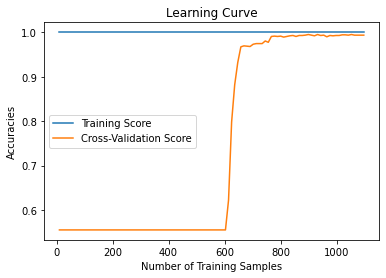

In [7]:
#plotting learning curves
plt.plot(train_size, train_mean, label = 'Training Score')
plt.plot(train_size, test_mean, label = 'Cross-Validation Score')

plt.title('Learning Curve')
plt.xlabel ('Number of Training Samples')
plt.ylabel ('Accuracies')
plt.legend(loc = 'best')

## 9.4. Saving Sklearn Models

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

In [9]:
# importing the dataset
banknote_data = pd.read_csv("E:/Datasets/banknote.csv" )

#printing the dataset header
banknote_data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
#extracting features
X = banknote_data.drop(['class'], axis=1)

#extracting labels
y = banknote_data["class"]

In [11]:
#dividing data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.20, random_state=0)

In [12]:
# feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [13]:
#importing the random forest algorithm from Sklearn
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=500)



In [14]:
#training the model
classifier= rf_clf.fit(X_train, y_train)

In [15]:
#saving the model using pickle
import pickle 
filename = "E:/Datasets/banknote_model.sav"
pickle.dump(classifier, open(filename, 'wb'))

In [16]:
# loading the model using pickle
loaded_classifier = pickle.load(open(filename, 'rb'))
y_pred  = loaded_classifier.predict(X_test)


In [17]:
#evaluating the algorithm on test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[155   2]
 [  2 116]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.98      0.98       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9854545454545455


## Exercise 9.1


### Question 1

With grid search you can?

A- Test all parameters for a model by default\
B- Test only lists of specified parameters\
C- Test three parameters \
D- None of the above

Answer: B
    
    
### Question 2

Learning curves can be used to study the :

A- Bias of a trained algorithm\
B- Variance of a trained algorithm \
C- Both of the above \
D- None of the above

Answer: C


### Question 3

Which pickle method can be used to save a trained machine learning model:

A- save() \
B- register() \
C- load() \
D- dump()

Answer: D

## Exercise 9.2

Use the Grid Search to find paramters of the RandomForestClassifier algorithm which return the highest classification accuracy for classifying the `banknote.csv` dataset: 

```
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
```



**Solution:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

# importing the dataset
banknote_data = pd.read_csv("E:/Datasets/banknote.csv" )

#printing the dataset header
banknote_data.head()

#extracting features
X = banknote_data.drop(['class'], axis=1)

#extracting labels
y = banknote_data["class"]

grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

#importing the GridSearchCV class
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=42, n_estimators=500)

gd_sr = GridSearchCV(estimator=rf_clf,
                     param_grid=grid_param,
                     scoring ="accuracy",
                     cv=5,
                     n_jobs=-1)

#training with grid search
gd_sr.fit(X, y)

#printing the best parameters
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}
